# Grading rubric
|Description | Points|
|---|---|
|Data preprocessing | 5 points|
|Regression with cross-validation| 7 points|
|Classification with cross validation | 8 points|
|Total | 20 points|

### Dataset:  [Airbnb Listings](https://www.kaggle.com/rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml#train.csv)  
(with little changes)

## Project Description and Requirements:
### Dataset requirements:
For this projects in this class, you will pick your datasets. The datasets should satisfy the following conditions:

- At least 15 features (columns)
- At least 1000 instances (rows)
- - Shape of train data:  
- - Shape of test data:  

- At least two categorical/ordinal columns.
- Between 5 to 10 percent missing values across the dataset.

#### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline

## Project Description:
Read data into Jupyter notebook, use pandas to import data into a data frame
Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Loading the dataset 

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print('Shape of train data: ', df.shape)

Shape of train data:  (74111, 29)


29 features and 74111 instances are avalable in this data set

In [5]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


Few changes in df...

In [6]:
df['host_response_rate']= pd.to_numeric(df['host_response_rate'].str.strip('%'))
df['room_type']= df['room_type'].map({'Entire home/apt':'Entire home/apt','Private room':'Private room','Shared room':'Private room'})

## Dataset Description and goal 

This dataset has many features that are important in the Airbnb price of a house or Apt or ... and might affect its Price.
The aim of this competition was to predict the price of AirBnB listings in major U.S. cities.

## Data Description 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
id                        74111 non-null int64
log_price                 74111 non-null float64
property_type             74111 non-null object
room_type                 74111 non-null object
amenities                 74111 non-null object
accommodates              74111 non-null int64
bathrooms                 73911 non-null float64
bed_type                  74111 non-null object
cancellation_policy       74111 non-null object
cleaning_fee              74111 non-null bool
city                      74111 non-null object
description               74111 non-null object
first_review              58247 non-null object
host_has_profile_pic      73923 non-null object
host_identity_verified    73923 non-null object
host_response_rate        55812 non-null float64
host_since                73923 non-null object
instant_bookable          74111 non-null object
last_review               58

In [8]:
df.isnull().sum()
# number of nulls

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
print('missing values across the dataset % {:.2f}'.format(df.isnull().sum().sum()/(len(df)*29)*100))

missing values across the dataset % 3.90


The number of nulls are didn't meet the requirments, we have to generate them.

In [10]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

#####  Target variable 
- SalePrice: the property's sale price in dollars. This is the target variable that we're trying to predict.

#####  Features 

- id: The Property id
- log price: the log price of the property for the night in dollar
- property type: Apartment or House 
    - Apartment = 1 and House = 0 <b>(since the apartment has more instanses)</b>
- room_type: Entire or Private
    - Entire = 1 and Private = 0
- amenities: list of all amenities
    - because all of them are unique the column will be dropped
- accommodates: Number of guests that a house can accommodate
- bathroom: Number of bathrooms
- bed_type: Airbed, couch, Futon, Pull out sofa, Real bed
    - there is no difference between them so we will use one hot-vector
- cancellation_policy: strict, moderate, flexible
- cleaning fee: True, they have cleaning fee False otherwise
    - we will use True = 1 and False = 0 <b>(since we have more instances with TRUE values)</b>
- city: NYC is a new york city and LA is Los Angeles, Boston, Chicago, DC, SF
    - we will use one-hot vector for this feature
- description: Description of the house
    - we will drop this column since all values are unique
- first_review: the date of the first review
    - we have to see the correlation matrix but, even with high numbers in there it is still not believable to find a relation between the date and price, So I'll drop this feature later.
- host_has_profile_pic: True means it has, False otherwise
    - we will use True = 1 and False = 0 <b>(since we have more instanses with TRUE vlaues)</b>
- host_identity_verified: True means it has, False otherwise
    - we will use True = 1 and False = 0 <b>(since we have more instanses with TRUE vlaues)</b>
- host_response_rate: % of respond rate, between 0 and 1
- host_since: the date of the host account
    - we have to see the correlation matrix but, even with high numbers in there it is still not believable to find a relation between the date and price, So I'll drop this feature later.
- instant_bookable: True means it has, False otherwise
    - we will use True = 1 and False = 0 <b>(since we have more instanses with TRUE vlaues)</b>
- last_review: the date of the last review
    - we have to see the correlation matrix but, even with high numbers in there it is still not believable to find a relation between the date and price, So I'll drop this feature later.
- latitude: related to the location of the house, great for the visualization but not useful for regression, however, the location can be scored base on the location, and neighborhood but for simplification, we will ignore this part
- longitude: related to the location of the house, great for the visualization but not useful for regression, however, the location can be scored base on the location and neighborhood but for simplification, we will ignore this part
- name: All unique values for the place
    - since all values are unique we will drop this feature
- neighborhood: related to the location of the house, great for the visualization but not useful for regression, however, the location can be scored base on the location, and neighborhood but for simplification, we will ignore this part
- number_of_reviews: number of views
- review_scores_rating: review score between 0 - 100
- thumbnail_url: 
    - not related to the regression
- zipcode: related to the location of the house, great for the visualization but not useful for regression, however, the location can be scored base on the location, and neighborhood but for simplification, we will ignore this part
- bedrooms: number of bedrooms a house has
- beds: number of beds a house have

In [11]:
df.drop(columns= ['id', 'amenities', 'description', 'first_review',
       'host_since','last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], inplace= True)

so we droped the features with mostly uniuqe instances so the we can draw smaller correlation matrix.

the data set has around 75,000 instanses and it will too long in the ML models to run each model. I will use only 10000 of them.


In [12]:
df=df[0:10000]

### Visualizing the missing portion of the dataset

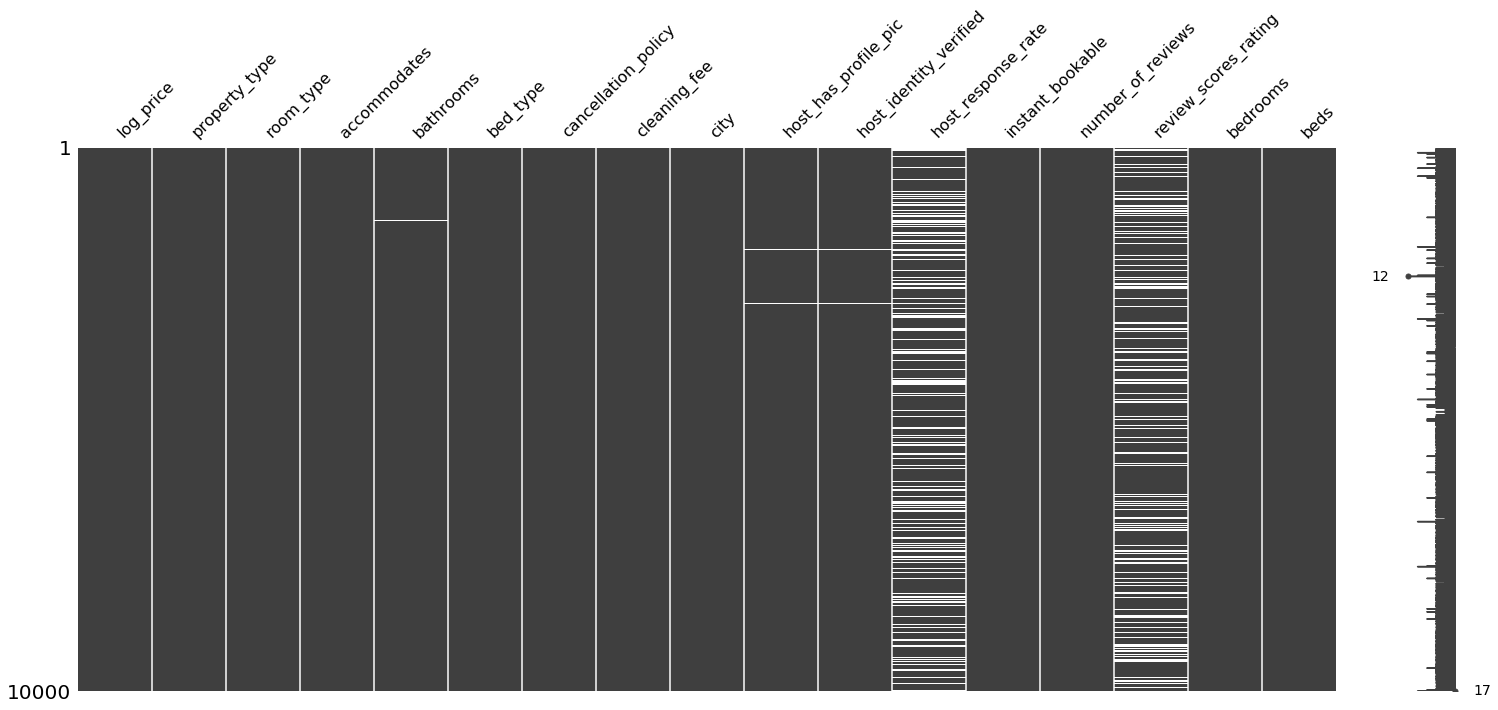

In [13]:
# !pip install missingno
import missingno as msno
msno.matrix(df)

In [14]:
print('missing values across the dataset % {:.2f}'.format(df.isnull().sum().sum()/(len(df)*17)*100))

missing values across the dataset % 2.91


So we have to generate missed values so we are going to generate them. now they are only in two columns.

### Creating missing data

We will create a mask here  that randomly will null out values in our dataset , we will pass p to the mask, which the first element, will determine the % of the missing data we want.

In [15]:
df = df.mask(np.random.choice([True, False], size=df.shape, p=[.02,.98]))

In [16]:
all_data_na = (df.isnull().sum() / len(df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
host_response_rate,26.87
review_scores_rating,24.54
bathrooms,2.39
host_has_profile_pic,2.39
host_identity_verified,2.26
instant_bookable,2.18
beds,2.17
room_type,2.13
log_price,2.09
number_of_reviews,2.09


visualizing the dataset after nulling out values at random

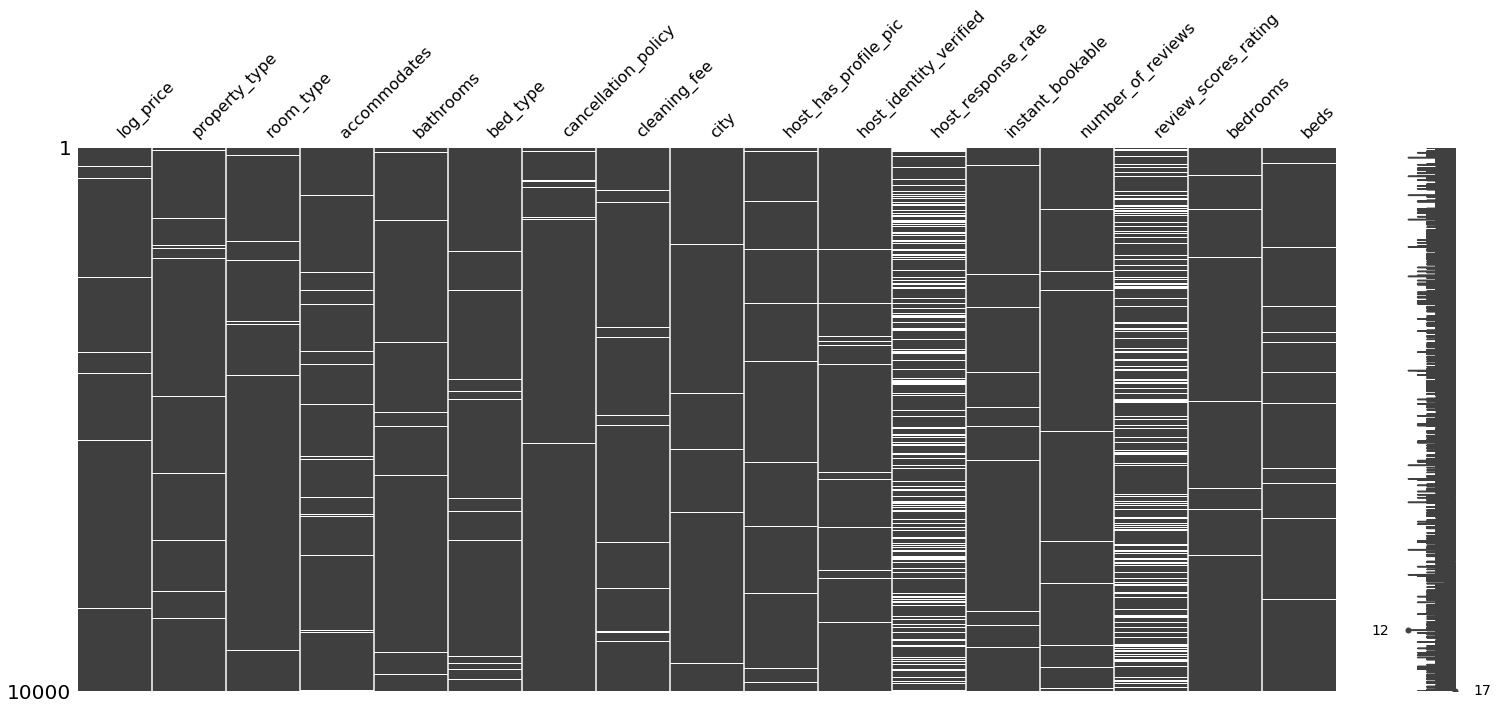

In [17]:
import missingno as msno
msno.matrix(df)

In [18]:
print('missing values across the dataset % {:.2f}'.format(df.isnull().sum().sum()/(len(df)/17)))

missing values across the dataset % 14.05


Now it is okay.

In [19]:
df.columns

Index(['log_price', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'instant_bookable', 'number_of_reviews', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

### Dropping and imputing missing data

So we have two general course of action regarding the missing data, either dropping them or replacing them with the mean or the median. Here in this case, most of our variables are catagorical and we will be dropping those because random assignment doesnt make sense.on other features we are going to use mean for normal distribution and median for skewed ones.

#### Dropping rows:

At first you might think it is best to impute the missing data however the features with missing data that remain are mostly categorical and mode isnt a correct representation of the missing values, so I've decided to drop the rows in order notto misrepresent the data. Also we are going to drop instances in target column with missing values\

In [20]:
rows_drop=['log_price', 'property_type', 'room_type',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 
       'instant_bookable']     
for i in rows_drop:
    df=df[df[i].notnull()]

In [21]:
df['accommodates'].fillna(df['accommodates'].median(),inplace=True)
df['bathrooms'].fillna(df[ 'bathrooms'].median(),inplace=True)
df['host_response_rate'].fillna(df['host_response_rate'].mean(),inplace=True)
df['number_of_reviews'].fillna(round(df['number_of_reviews'].mean(),0),inplace=True)
df['review_scores_rating'].fillna(round(df[ 'review_scores_rating'].mean()),inplace=True)
df['bedrooms'].fillna(df['bedrooms'].median(),inplace=True)
df['beds'].fillna(df['beds'].median(),inplace=True)

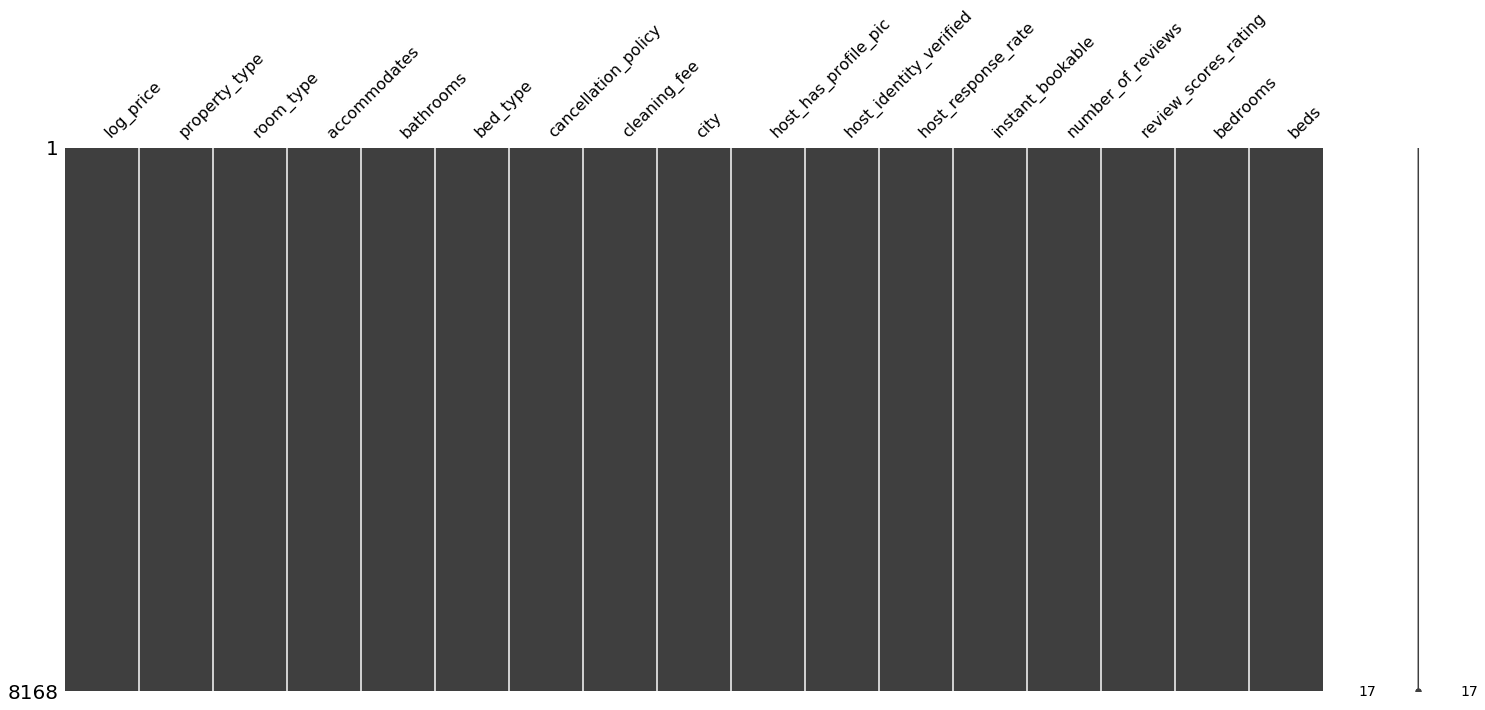

In [22]:
msno.matrix(df)

In [23]:
df.shape
# row and columns after cleaning

(8168, 17)

### Datatypes and Transformations

In [24]:
df.dtypes

log_price                 float64
property_type              object
room_type                  object
accommodates              float64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee              float64
city                       object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate        float64
instant_bookable           object
number_of_reviews         float64
review_scores_rating      float64
bedrooms                  float64
beds                      float64
dtype: object

In [25]:
df.bed_type.unique()

array(['Real Bed', 'Futon', 'Couch', 'Pull-out Sofa', 'Airbed'],
      dtype=object)

In [26]:
df.head(10)

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,3.0,1.0,Real Bed,strict,1.0,NYC,t,t,94.161728,f,2.0,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,7.0,1.0,Real Bed,strict,1.0,NYC,t,f,100.000000,t,6.0,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,5.0,1.0,Real Bed,moderate,1.0,NYC,t,t,100.000000,t,10.0,92.0,1.0,3.0
5,4.442651,Apartment,Private room,2.0,1.0,Real Bed,strict,1.0,SF,t,t,100.000000,t,3.0,100.0,1.0,1.0
6,4.418841,Apartment,Entire home/apt,3.0,1.0,Real Bed,moderate,1.0,LA,t,f,100.000000,t,15.0,97.0,1.0,1.0
7,4.787492,Condominium,Entire home/apt,2.0,1.0,Real Bed,moderate,1.0,LA,t,t,100.000000,f,9.0,93.0,1.0,1.0
8,4.787492,House,Private room,2.0,1.0,Real Bed,moderate,1.0,SF,t,f,100.000000,f,159.0,99.0,1.0,1.0
9,3.583519,House,Private room,2.0,1.0,Real Bed,moderate,1.0,LA,t,f,100.000000,t,2.0,90.0,1.0,1.0
10,4.605170,Apartment,Private room,2.0,1.0,Real Bed,strict,1.0,NYC,t,t,100.000000,f,82.0,93.0,1.0,1.0
12,4.248495,Apartment,Private room,2.0,1.0,Real Bed,flexible,1.0,LA,t,f,94.161728,f,0.0,94.0,1.0,1.0


In [27]:
df['room_type'] = df['room_type'].map({'Entire home/apt':1,'Private room':0}).astype(int)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t':1,'f':0}).astype(int)
df['host_identity_verified'] = df['host_identity_verified'].map({'t':1,'f':0}).astype(int)
df['instant_bookable'] = df['instant_bookable'].map({'t':1,'f':0}).astype(int)

Now one hot-vectors

In [28]:
emb=pd.get_dummies(df['property_type'],columns='property_type',prefix='property_type ')
df=pd.concat([df, emb], axis=1)
df.drop(['property_type'],axis=1,inplace= True)

In [29]:
emb=pd.get_dummies(df['bed_type'],columns='bed_type',prefix='bed_type ')
df=pd.concat([df, emb], axis=1)
df.drop(['bed_type'],axis=1,inplace= True)

In [30]:
emb=pd.get_dummies(df['cancellation_policy'],columns='cancellation_policy',prefix='cancellation_policy ')
df=pd.concat([df, emb], axis=1)
df.drop(['cancellation_policy'],axis=1,inplace= True)

In [31]:
emb=pd.get_dummies(df['city'],columns='city',prefix='city ')
df=pd.concat([df, emb], axis=1)
df.drop(['city'],axis=1,inplace= True)

In [32]:
df.head()

,log_price,room_type,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,cancellation_policy _moderate,cancellation_policy _strict,cancellation_policy _super_strict_30,cancellation_policy _super_strict_60,city _Boston,city _Chicago,city _DC,city _LA,city _NYC,city _SF
0,5.010635,1,3.0,1.0,1.0,1,1,94.161728,0,2.0,...,0,1,0,0,0,0,0,0,1,0
1,5.129899,1,7.0,1.0,1.0,1,0,100.000000,1,6.0,...,0,1,0,0,0,0,0,0,1,0
2,4.976734,1,5.0,1.0,1.0,1,1,100.000000,1,10.0,...,1,0,0,0,0,0,0,0,1,0
5,4.442651,0,2.0,1.0,1.0,1,1,100.000000,1,3.0,...,0,1,0,0,0,0,0,0,0,1
6,4.418841,1,3.0,1.0,1.0,1,0,100.000000,1,15.0,...,1,0,0,0,0,0,0,1,0,0


In [33]:
df.describe()

,log_price,room_type,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,...,cancellation_policy _moderate,cancellation_policy _strict,cancellation_policy _super_strict_30,cancellation_policy _super_strict_60,city _Boston,city _Chicago,city _DC,city _LA,city _NYC,city _SF
count,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,...,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.000000,8168.00000,8168.000000,8168.000000,8168.000000
mean,4.782515,0.558888,3.121939,1.221780,0.734574,0.997307,0.672625,94.161728,0.261753,21.119246,...,0.256121,0.434990,0.001224,0.000245,0.047870,0.050930,0.07407,0.299706,0.434623,0.092801
std,0.711945,0.496550,2.140199,0.560582,0.441587,0.051832,0.469284,14.155851,0.439616,38.541062,...,0.436516,0.495786,0.034971,0.015647,0.213504,0.219869,0.26190,0.458157,0.495738,0.290171
min,2.302585,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.317488,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,94.161728,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.718499,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,5.192957,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,23.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,7.598399,1.000000,16.000000,8.000000,1.000000,1.000000,1.000000,100.000000,1.000000,480.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Correlation and highly correlated features

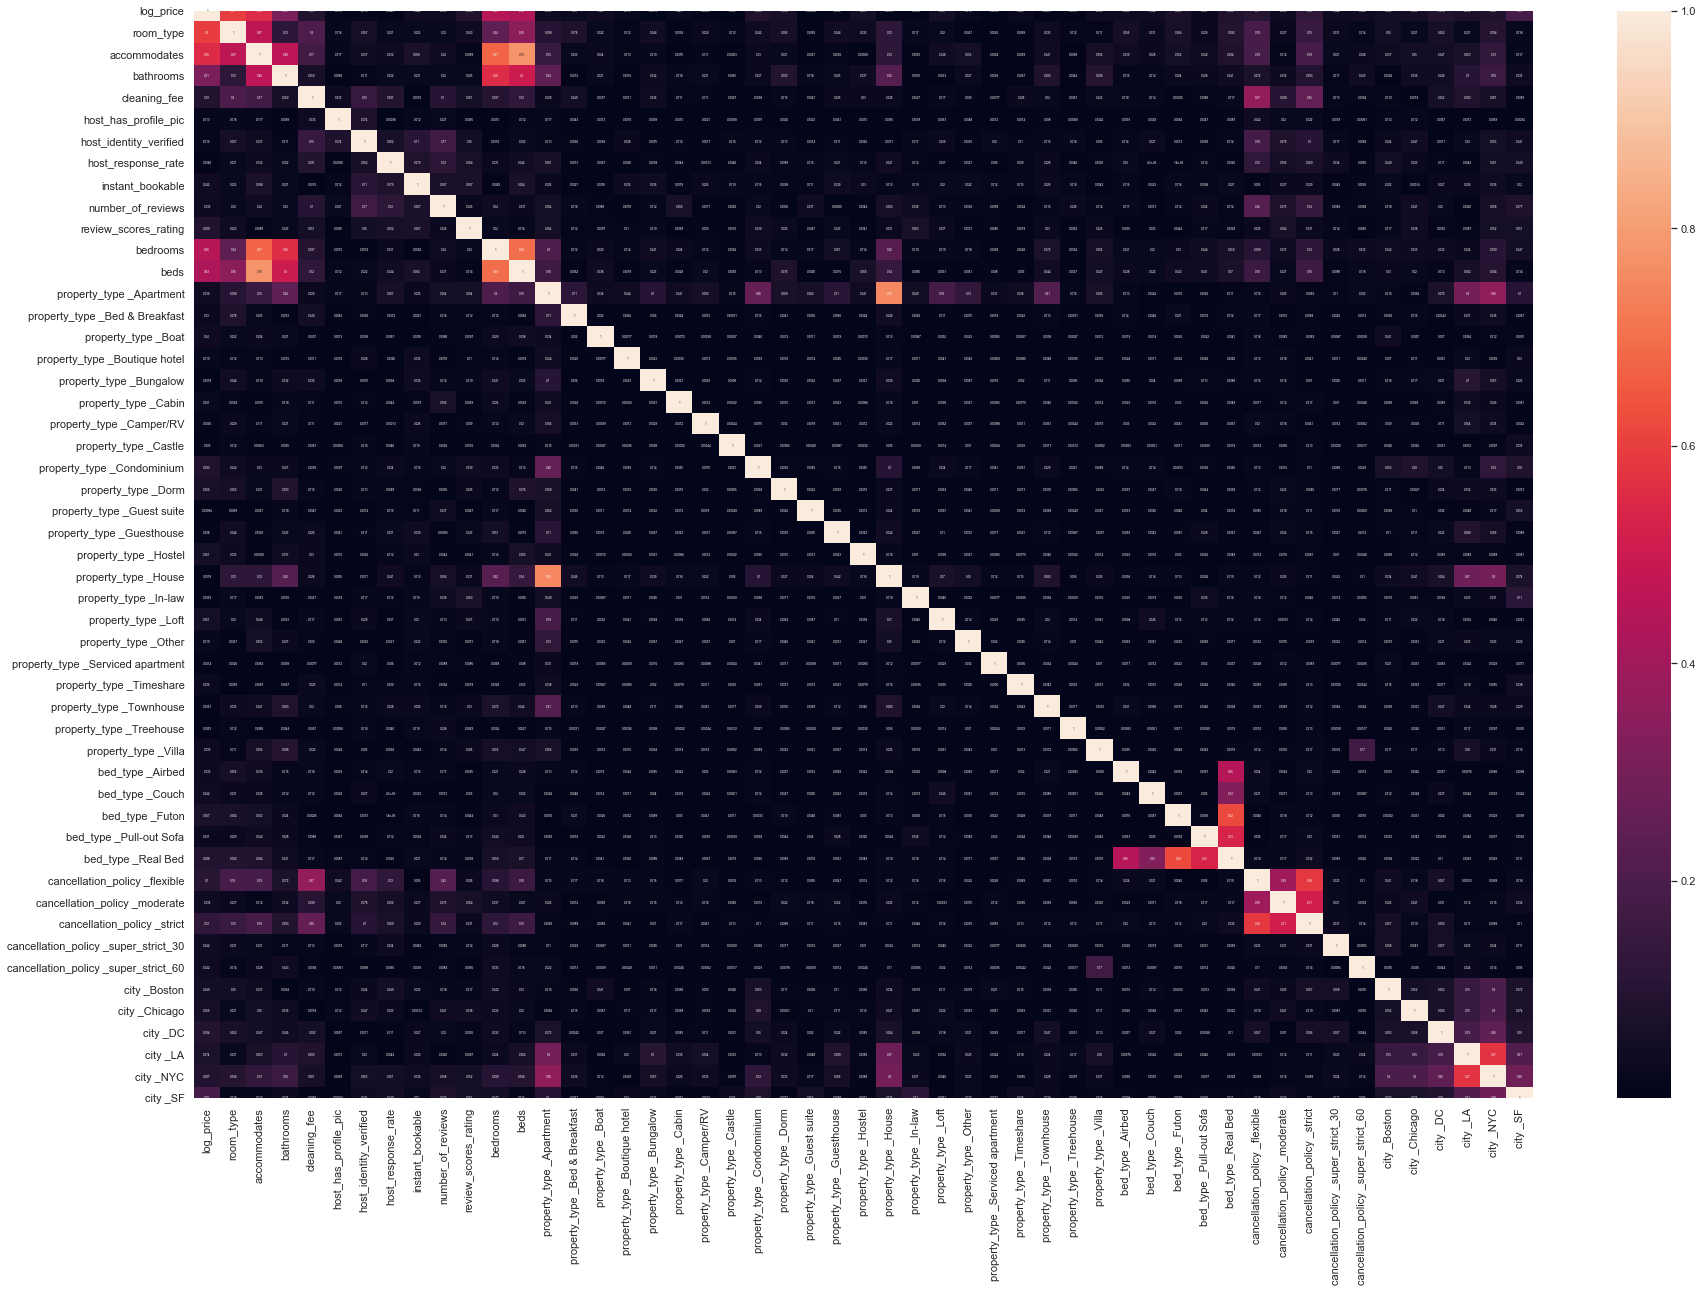

In [34]:
# Correlation of all the variables with respect to each other
sns.set(font_scale=1.8)
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr().abs(),annot=True, annot_kws={"size": 3})

As it shows most of the variables don't have a correlation to each other more than 70% so there is no need to be worried about collinearity. on the other hand, log_price has a relation with bedrooms, beds, room_type, and accommodates.


## Scaling and  transformation 

0.5068655635085126


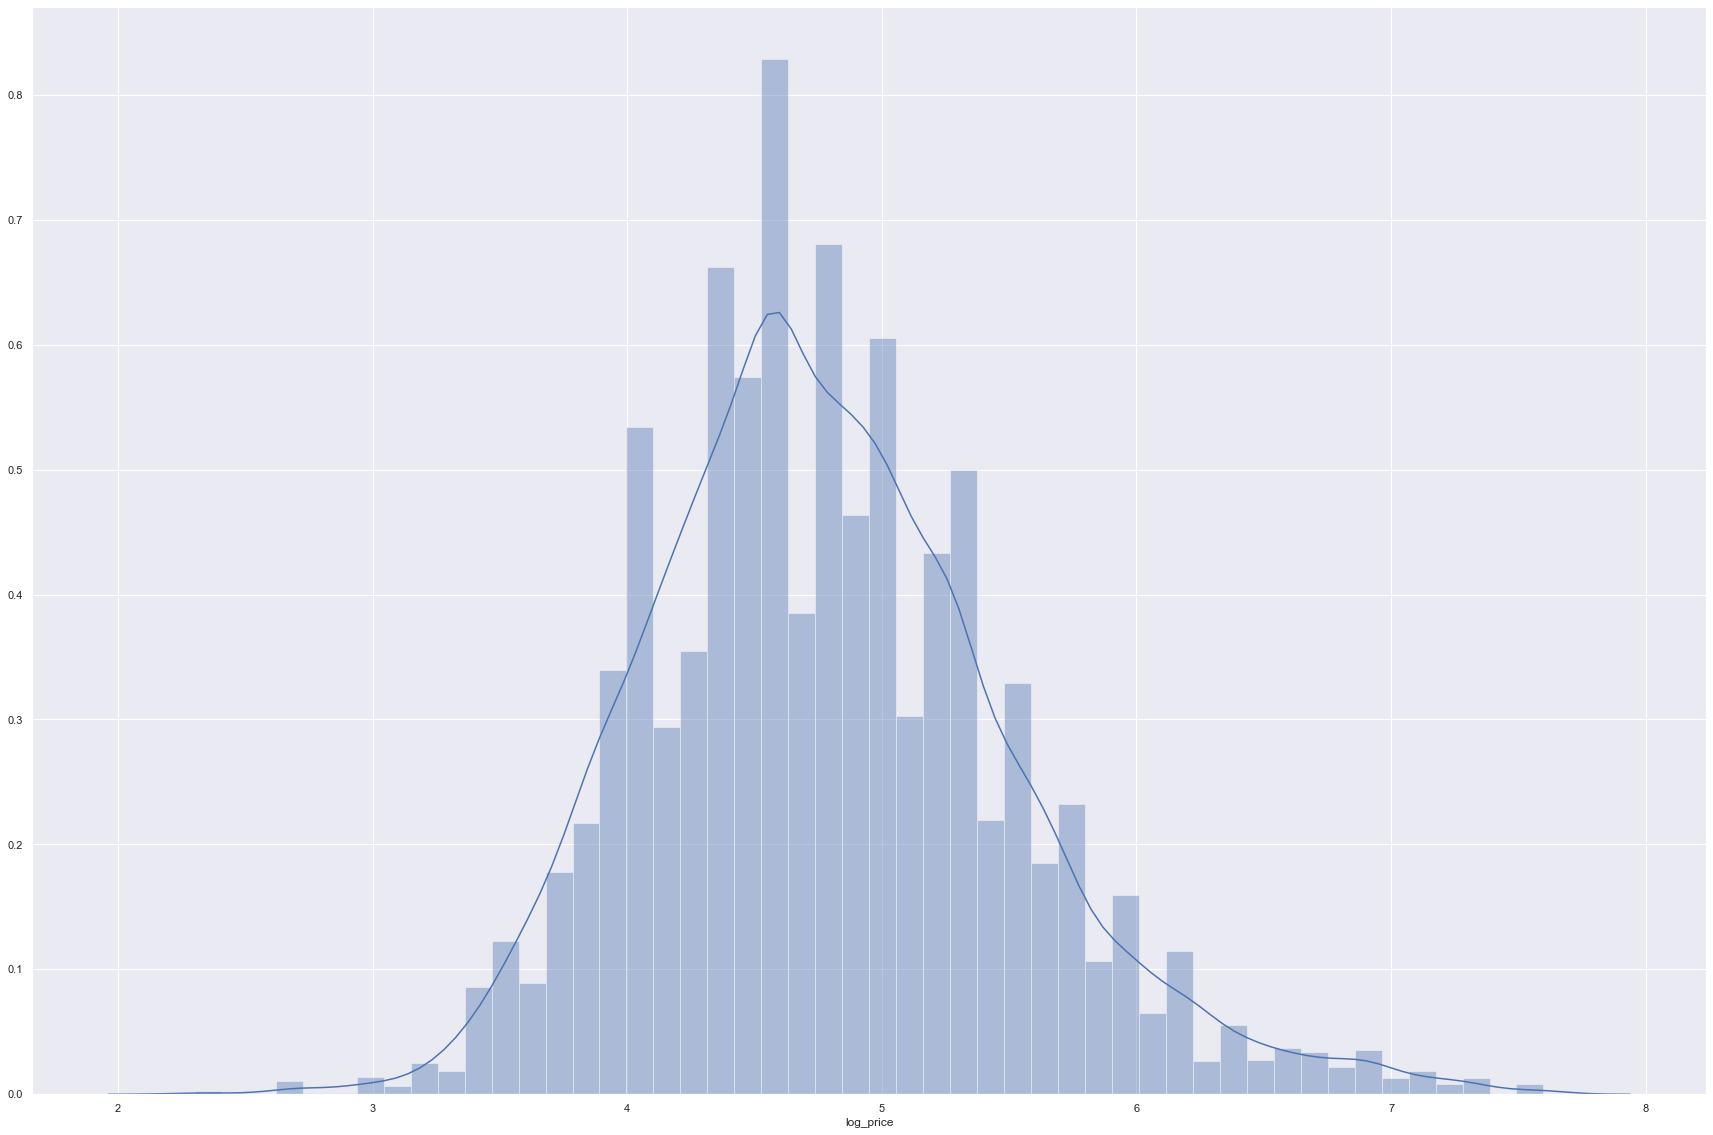

In [35]:
#histogram of target variable :
sns.distplot(df['log_price']);

print(df.log_price.var())

since the data already logged the histogram looks just fine

### Dropping index + target features

the data set has around 40,000 instanses and it will too long in the ML models to run each model. I will use only 10,000 of them.

In [36]:
df_org = df
y_org = df['log_price']
X_org = df.drop(columns=['log_price'],axis=1)

```python MinMaxScaler(feature_range = (0, 1))``` will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

```python StandardScaler()``` will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

If there are outliers, use ```pyhton RobustScaler()```. Alternatively you could remove the outliers and use either of the above 2 scalers (choice depends on whether data is normally distributed)

based on the explanation above I will use the MinMaxScaler. However, our data are mostly less than 10 and exept for one or two featuers there is no need for scaleing

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X_org,y_org, test_size=0.25, random_state=0)



In [38]:
X_train_org.describe()

,room_type,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,cancellation_policy _moderate,cancellation_policy _strict,cancellation_policy _super_strict_30,cancellation_policy _super_strict_60,city _Boston,city _Chicago,city _DC,city _LA,city _NYC,city _SF
count,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,...,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000
mean,0.559582,3.110839,1.225106,0.729350,0.997225,0.670748,94.097096,0.263304,21.231636,93.918707,...,0.254816,0.437969,0.000816,0.000326,0.048155,0.052073,0.073294,0.300359,0.433072,0.093046
std,0.496478,2.102272,0.561424,0.444332,0.052610,0.469980,14.368519,0.440462,38.695070,7.357701,...,0.435793,0.496178,0.028560,0.018067,0.214112,0.222193,0.260640,0.458452,0.495541,0.290521
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,94.161728,0.000000,1.000000,93.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,6.000000,94.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,22.000000,98.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,16.000000,8.000000,1.000000,1.000000,1.000000,100.000000,1.000000,480.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train_org),columns=X_train_org.columns)
X_test = pd.DataFrame(scaler.transform(X_test_org),columns=X_test_org.columns)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6126, 50) (6126,) (2042, 50) (2042,)


In [40]:
X_train.describe()

,room_type,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,cancellation_policy _moderate,cancellation_policy _strict,cancellation_policy _super_strict_30,cancellation_policy _super_strict_60,city _Boston,city _Chicago,city _DC,city _LA,city _NYC,city _SF
count,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,...,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000,6126.000000
mean,0.559582,0.140723,0.153138,0.729350,0.997225,0.670748,0.940971,0.263304,0.044233,0.923984,...,0.254816,0.437969,0.000816,0.000326,0.048155,0.052073,0.073294,0.300359,0.433072,0.093046
std,0.496478,0.140151,0.070178,0.444332,0.052610,0.469980,0.143685,0.440462,0.080615,0.091971,...,0.435793,0.496178,0.028560,0.018067,0.214112,0.222193,0.260640,0.458452,0.495541,0.290521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.066667,0.125000,0.000000,1.000000,0.000000,0.941617,0.000000,0.002083,0.912500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066667,0.125000,1.000000,1.000000,1.000000,1.000000,0.000000,0.012500,0.925000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.200000,0.125000,1.000000,1.000000,1.000000,1.000000,1.000000,0.045833,0.975000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results.
- Then use cross-validation to find average training and testing score.
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels.
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict the target values for the test_set.

# ML models

## 1. KNN regressor 

Text(0, 0.5, 'Score')

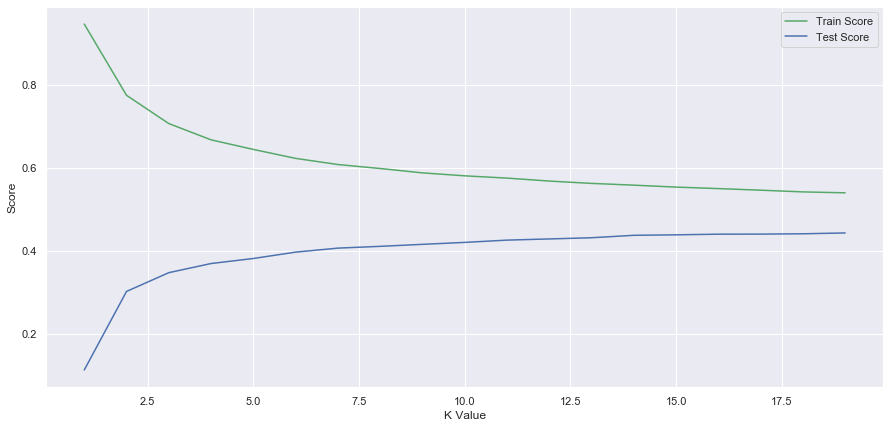

In [41]:
from sklearn.neighbors import KNeighborsRegressor

sns.set(rc={'figure.figsize':(15,7)})

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend() 
plt.xlabel('K Value')
plt.ylabel('Score')

In [42]:
from sklearn.metrics import mean_squared_error
knn_reg = KNeighborsRegressor(3)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)
print('Train score: {:.4f} %'.format(knn_reg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))
print('r2_score :', knn_reg.score(X_test,y_test))

Train score: 70.7158 %
Test score: 34.7600 %
RMSE: 0.5730
r2_score : 0.3475999336885124


In [43]:
from pprint import pprint
pprint(knn_reg.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}


#### KNN regressor Gridsearch 

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid_knn = {
            'n_neighbors' : range(1,25),
            'weights': ['distance','uniform']
            }

CV_knn = GridSearchCV(estimator =knn_reg, param_grid = param_grid_knn ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_knn.fit(X_train, y_train)

best_parameters_knn=CV_knn.best_params_
print(best_parameters_knn)

{'n_neighbors': 19, 'weights': 'uniform'}


C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### Best params for KNN Regressor from GridSearch

In [45]:
knn_reg=KNeighborsRegressor(n_neighbors=CV_knn.best_params_.get('n_neighbors'),weights='uniform')

knn_reg.fit(X_train, y_train)

y_pred_knn=knn_reg.predict(X_test)

print('Train score: {:.4f} %'.format(knn_reg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(knn_reg.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
print('r2_score :', knn_reg.score(X_test,y_test))
knn_reg_S = knn_reg.score(X_test,y_test)

Train score: 54.0145 %
Test score: 44.3362 %
RMSE: 0.5293
r2_score : 0.4433617832102187


It used the r2_score as the goal. and based on what we saw in the correlation matrix, the low test score was predictable.

#### Cross Validation - KNN Regressor

In [46]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores_train = cross_val_score(knn_reg, X_train, y_train,cv=10)
scores_test = cross_val_predict(knn_reg, X_test, y_test,cv=10)
print("Average cross-validation score_train: {:.4f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.4840
Average cross-validation score_test: 4.79


## 2.linear regression

In [47]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.metrics import mean_squared_error
pred_linear = lreg.predict(X_test)

print('Train score: {:.4f} %'.format(lreg.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear))))
print ("r2_score : ", lreg.score(X_test,y_test))
lreg_S = lreg.score(X_test,y_test)

Train score: 55.4796 %
Test score: 50.3333 %
RMSE: 0.5000
r2_score :  0.5033334904250996


(6126,)
(6126, 1)


Text(0.5, 0, 'accommodates')

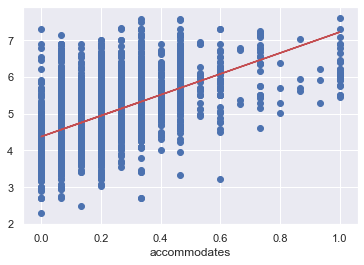

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
# print(X_train)

X_train_ac = X_train.values[:,1].reshape(-1,1)
print(X_train.values[:,1].shape)
print(X_train_ac.shape)
lreg.fit(X_train_ac, y_train)
y_predict = lreg.predict(X_train_ac)

plt.plot(X_train_ac, y_predict, c = 'r')
plt.scatter(X_train_ac,y_train)
plt.xlabel('accommodates')

#### Cross Validation - Linear Regression

In [50]:
from sklearn.model_selection import cross_val_score, cross_val_predict
lin_reg = LinearRegression()
scores_train = cross_val_score(lin_reg, X_train, y_train,cv=10)
scores_test = cross_val_predict(lin_reg, X_test, y_test,cv=10)
print("Average cross-validation score_train: {:.4f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.5437
Average cross-validation score_test: 24376671.78


It doesn't have any hyperparameter so there is no need for grid-search

## 3.Ridge

In [51]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100, 1000]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha,random_state=0)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

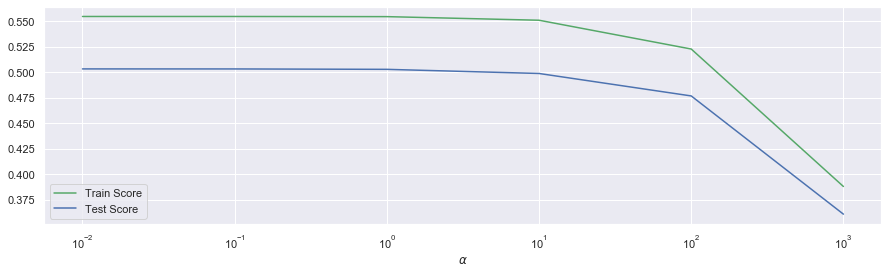

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,4)})

plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### GridSearch

In [53]:
from sklearn.model_selection import GridSearchCV
param = {
            'alpha' : [0.01, 0.1, 1, 10, 100, 1000]
            }

CV_ridge = GridSearchCV(estimator =ridge, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_ridge.fit(X_train, y_train)

best_parameters_ridge=CV_ridge.best_params_
print(best_parameters_ridge)

{'alpha': 1}


C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


### Feature selection 

I Just show the calculations but I'm not going to use it because it is not the case of over fitting.  
Also, we can see the most important features.


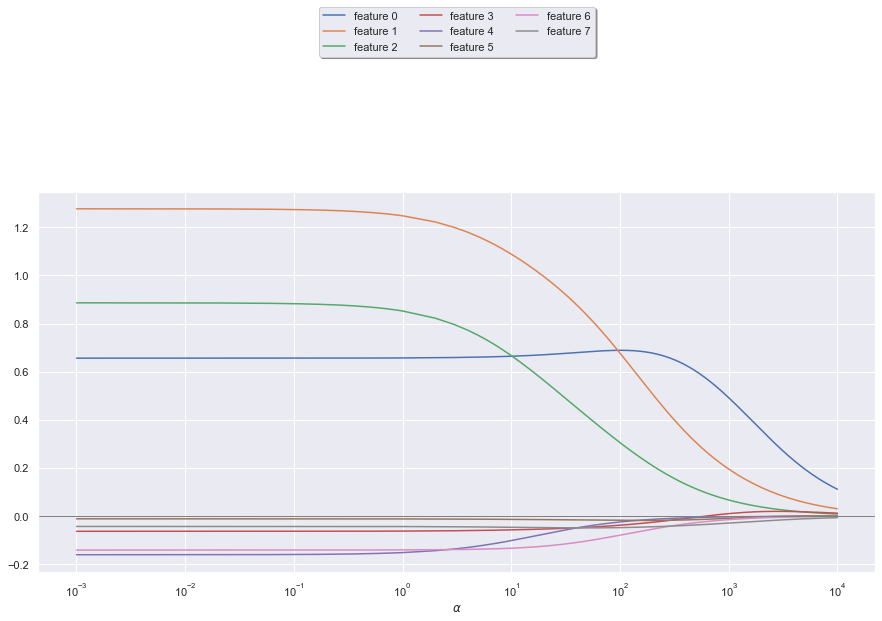

In [54]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha,random_state=0)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

the best model

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
ridge1 = Ridge(alpha =CV_ridge.best_params_.get('alpha'),random_state=0)
ridge1.fit(X_train, y_train)

pred_ridge1 = ridge1.predict(X_test)

print('Train score: {:.4f} %'.format(ridge1.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(ridge1.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_ridge1))))
print ("r2_score : ", ridge1.score(X_test,y_test))
ridge1_S=ridge1.score(X_test,y_test)

Train score: 55.4644 %
Test score: 50.2905 %
RMSE: 0.5002
r2_score :  0.5029048723304245


CV

In [56]:
scores_train = cross_val_score(ridge1, X_train, y_train, cv= 10)
scores_test = cross_val_score(ridge1, X_test, y_test, cv= 10)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score_train: {:.4f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [0.50048185 0.53937199 0.53170925 0.5775199  0.49534686 0.57320083
 0.59026799 0.5799406  0.49458718 0.56134208]
Cross-validation scores_test: [0.4848092  0.43080499 0.57967649 0.4153975  0.53084906 0.43497602
 0.4524962  0.49345449 0.53020717 0.55224088]
Average cross-validation score_train: 0.5444
Average cross-validation score_test: 0.49


## 4.Lasso

In [57]:
from sklearn.linear_model import Lasso
x_range = [0.0001,0.001,0.01, 0.1, 1]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

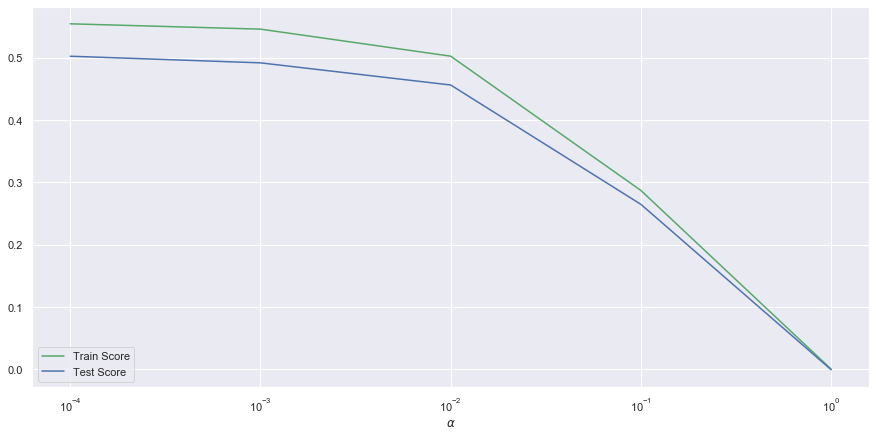

In [58]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### GridSearch

In [59]:
param = {
            'alpha' : [0.0001,0.001,0.01, 0.1, 1, 10, 100]
            }

CV_lasso = GridSearchCV(estimator =lasso, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_lasso.fit(X_train, y_train)

best_parameters_lasso=CV_lasso.best_params_
print(best_parameters_lasso)

{'alpha': 0.0001}


C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


the best model

In [60]:
lasso = Lasso(alpha = CV_lasso.best_params_.get('alpha'),random_state=0)
lasso.fit(X_train,y_train)

y_pred_lasso=lasso.predict(X_test)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test,y_test))
lasso_S = lasso.score(X_test,y_test)

Train score: 55.4394 %
Test score: 50.2367 %
RMSE: 0.5005
r2_score : 0.502367367163491


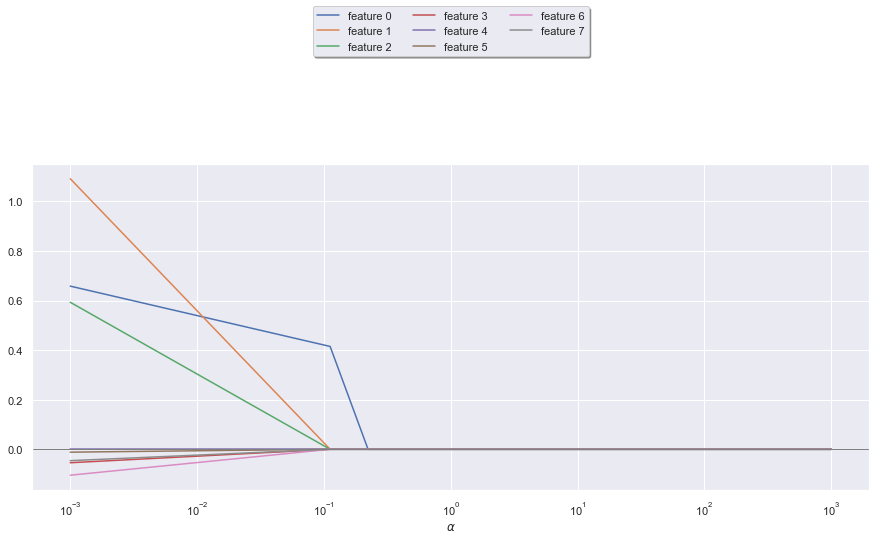

In [61]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,6)})


x_range1 = np.linspace(0.001, 1, 10).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha,random_state=0)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

### Cross validation -Lasso

In [62]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores_train = cross_val_score(lasso, X_train, y_train,cv=10)
scores_test = cross_val_predict(lasso, X_train, y_train,cv=10)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score: {:.4f}".format(scores_train.mean()))
print("Average cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [-3.56007956e-04 -1.76021488e-03 -3.58072349e-05 -1.11279816e-03
 -7.47058877e-06 -3.32974793e-03 -4.34965549e-04 -3.37734676e-03
 -2.24985125e-05 -2.52893802e-03]
Cross-validation scores_test: [4.7784229 4.7784229 4.7784229 ... 4.7807906 4.7807906 4.7807906]
Average cross-validation score: -0.0013
Average cross-validation score: 4.78


## SGD Regressor

In [63]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, max_iter = 100000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)
print(sgd_reg.score(X_train, y_train))
print(sgd_reg.score(X_test, y_test))

-875837439233870.1
-760066675127372.1


#### GridSearch

In [64]:
param = {
            'max_iter' : [0.0001,0.001,0.01, 0.1, 1, 10, 100,1000,10000,100000]
            }

CV_sgd_reg = GridSearchCV(estimator =sgd_reg, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_sgd_reg.fit(X_train, y_train)

best_parameters_sgd_reg=CV_sgd_reg.best_params_
print(best_parameters_sgd_reg)

{'max_iter': 0.0001}


C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [65]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 0.0001, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)

print('Train score: {:.4f} %'.format(lasso.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(lasso.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso))))
print('r2_score :', lasso.score(X_test,y_test))

Train score: 0.0000 %
Test score: -0.0921 %
RMSE: 0.5005
r2_score : -0.0009214558309931231


## 5.Polynomial regression 

In [66]:
from sklearn.preprocessing import PolynomialFeatures
train_score_list = []
test_score_list = []
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
y_pred_poly=lreg.predict(X_test_poly)
print('r2_score :', lreg.score(X_test_poly,y_test))

r2_score : -3.692451576238759e+19


visual search for best degree

In [67]:
train_score_list = []
test_score_list = []

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))

In [68]:
print(train_score_list)
print(test_score_list)

[0.5547858227609721, 0.6317555395761426, 0.7414740902517392]
[0.5033454447466288, -3.692451576238759e+19, -24911983615.244186]


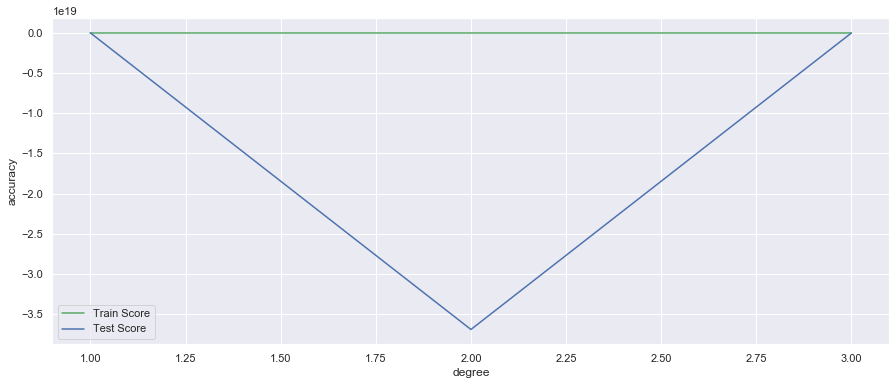

In [69]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,6)})


x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

### best poly model

In [70]:
poly = PolynomialFeatures(3)
lreg = LinearRegression()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

y_pred_poly=lreg.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg.score(X_test_poly, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_poly))))
print('r2_score :', lreg.score(X_test_poly,y_test))
poly_S = 'negative'

Train score: 74.1474 %
Test score: -2491198361524.4185 %
RMSE: 111972.8644
r2_score : -24911983615.244186


### Cross validation poly

In [71]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores_train = cross_val_score(lreg, X_train_poly, y_train,cv=10)
scores_test = cross_val_predict(lreg, X_train_poly, y_train,cv=10)

print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score: {:.4f}".format(scores_train.mean()))
print("Average cross-validation score: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [-3.61363719e+10 -3.74963529e+11 -1.85854507e+12 -2.23917536e+12
 -1.31305240e+12 -4.34867723e+13 -1.26135644e+17 -4.63816327e+11
 -2.19205497e+19 -2.42869240e+12]
Cross-validation scores_test: [3.77614286e+00 4.09971825e+00 6.03983981e+00 ... 1.54287638e+06
 3.88514445e+00 5.61546401e+00]
Average cross-validation score: -2204673751078980096.0000
Average cross-validation score: -3527429.43


## 6. SVMs

### Simple SVM

I know the max iteration is not a hyperparamiter for models but I what to see the effect, and with the low max_iter python will give the warning. 

C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

Text(0, 0.5, 'Score')

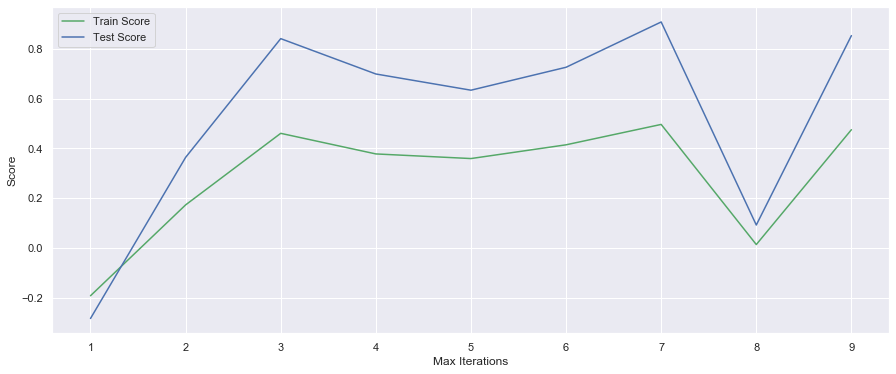

In [72]:
from sklearn.svm import LinearSVR, SVR

sns.set(rc={'figure.figsize':(15,6)})
linear_svm = LinearSVR(random_state=0)

linear_svm.fit(X_train, y_train)
y_pred=linear_svm.predict(X_test)

train_score_array = []
test_score_array = []

for n in range(1,10):
    linear_svm = LinearSVR(max_iter=n)
    linear_svm.fit(X_train, y_train)
    train_score_array.append(linear_svm.score(X_train, y_train))
    test_score_array.append(linear_svm.score(X_test, y_pred))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Iterations')
plt.ylabel('Score')

#### Grid Search

In [73]:
from sklearn import svm
from sklearn.svm import SVR

param = {
            'max_iter':[0.01,0.1,1,10,100,1000,10000,100000]
                }


CV_linear_svm = GridSearchCV(estimator =linear_svm, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_linear_svm.fit(X_train, y_train)

best_parameters_linear_svm=CV_linear_svm.best_params_
print(best_parameters_linear_svm)

{'max_iter': 1000}


C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The best model is:

In [74]:
linear_svm = LinearSVR(max_iter=10000,random_state=0)
linear_svm.fit(X_train, y_train)

y_pred_svm=linear_svm.predict(X_test)

print('Train score: {:.4f} %'.format(linear_svm.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(linear_svm.score(X_test, y_test)*100))
print('r2_score :', linear_svm.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_svm))))
linear_svm_S  = linear_svm.score(X_test,y_test)

Train score: 54.8847 %
Test score: 49.4550 %
r2_score : 0.49454952737953706
RMSE: 0.5044


#### cross validation -SVM


In [75]:
from sklearn.model_selection import cross_val_score, cross_val_predict
linear_svr = LinearSVR(max_iter=10000,random_state=0)
scores_train = cross_val_score(linear_svr, X_train, y_train,cv=10)
scores_test = cross_val_predict(linear_svr, X_test, y_test,cv=10)
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.54
Average cross-validation score_test: 4.77


###  SVR with linear Kernel

In [76]:
clf = SVR(kernel='linear', C=1)
clf.fit(X_train,y_train)
y_pred_clf=clf.predict(X_test)
print('Train score: {:.4f} %'.format(clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf.score(X_test, y_test)*100))
print('r2_score :', clf.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_clf))))

Train score: 54.9059 %
Test score: 49.4692 %
r2_score : 0.4946921297164778
RMSE: 0.5043


#### CV for SVR 

In [77]:
from sklearn import svm
from sklearn.svm import SVR

param = {
            'C':[0.01,1,100], 'kernel' :['linear']
                }


CV_clf = GridSearchCV(estimator =clf, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_clf.fit(X_train, y_train)

best_parameters_clf=CV_clf.best_params_
print(best_parameters_clf)

C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'C': 1, 'kernel': 'linear'}


The best model is:

In [78]:
clf = SVR(kernel='linear', C=CV_clf.best_params_.get('C'))
clf.fit(X_train, y_train)

y_pred_clf=clf.predict(X_test)

print('Train score: {:.4f} %'.format(clf.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf.score(X_test, y_test)*100))
print('r2_score :', clf.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_clf))))
clf_S =clf.score(X_test,y_test)

Train score: 54.9059 %
Test score: 49.4692 %
r2_score : 0.4946921297164778
RMSE: 0.5043


#### cross validation -SVM


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict
clf = SVR(kernel='linear', C=10)
scores_train = cross_val_score(clf, X_train, y_train,cv=10)
scores_test = cross_val_predict(clf, X_test, y_test,cv=10)
# print("Cross-validation scores_train: {}".format(scores_train))
# print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.54
Average cross-validation score_test: 4.77


###  SVR with Poly Kernel

In [80]:
clf_poly = SVR(kernel='poly',degree = 1, C = 1, gamma = 'auto')
clf_poly.fit(X_train,y_train)
clf_poly.score(X_train,y_train)

0.537576515760964

#### Grid Search

In [81]:
param = {
            'C':[0.1,1, 10], 'degree': [1,2,3], 'kernel' :['poly']
                }
CV_clf_poly = GridSearchCV(estimator =clf_poly, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_clf_poly.fit(X_train, y_train)

best_parameters_clf_poly=CV_clf_poly.best_params_
print(best_parameters_clf_poly)

C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'C': 10, 'degree': 2, 'kernel': 'poly'}


Best model will be:

In [82]:
clf_poly = SVR(kernel='poly',degree = CV_clf_poly.best_params_.get('degree'),
               C = CV_clf_poly.best_params_.get('C'),gamma='auto')
clf_poly.fit(X_train, y_train)

y_pred_clf_poly=clf_poly.predict(X_test)

print('Train score: {:.4f} %'.format(clf_poly.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf_poly.score(X_test, y_test)*100))
print('r2_score :', clf_poly.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_clf_poly))))
clf_poly_S = clf_poly.score(X_test,y_test)

Train score: 56.8345 %
Test score: 51.0000 %
r2_score : 0.5100003641673975
RMSE: 0.4966


#### cross validation -SVM


In [83]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores_train = cross_val_score(clf_poly, X_train, y_train,cv=10)
scores_test = cross_val_predict(clf_poly, X_test, y_test,cv=10)
# print("Cross-validation scores_train: {}".format(scores_train))
# print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Average cross-validation score_train: 0.55
Average cross-validation score_test: 4.77


###  SVR with rbf Kernel

In [84]:
clf_SVR = SVR(kernel='rbf', C=1, gamma = 0.1)
clf_SVR.fit(X_train,y_train)
clf_SVR.score(X_train,y_train)

0.593986226372378

#### Grid Search

In [85]:
param = {
            'C':[0.1,1, 100], 'gamma': [0.001, 0.01,1,10], 'kernel' :['rbf']
                }
CV_clf_SVR = GridSearchCV(estimator =clf_SVR, param_grid = param ,cv = 10,
                      iid= False, return_train_score = True, n_jobs = -1)
CV_clf_SVR.fit(X_train, y_train)

best_parameters_clf_SVR=CV_clf_SVR.best_params_
print(best_parameters_clf_SVR)

C:\Users\mahdi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


Best model will be:

In [86]:
clf_SVR = SVR(kernel='rbf', C=CV_clf_SVR.best_params_.get('C'), gamma = CV_clf_SVR.best_params_.get('gamma'))
clf_SVR.fit(X_train, y_train)

y_pred_clf_SVR=clf_SVR.predict(X_test)

print('Train score: {:.4f} %'.format(clf_SVR.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(clf_SVR.score(X_test, y_test)*100))
print('r2_score :', clf_SVR.score(X_test,y_test))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_clf_SVR))))
clf_SVR_S = clf_SVR.score(X_test,y_test)

Train score: 59.2149 %
Test score: 51.9203 %
r2_score : 0.5192027736391902
RMSE: 0.4919


#### cross validation -SVM


In [87]:
from sklearn.model_selection import cross_val_score, cross_val_predict

scores_train = cross_val_score(clf_SVR, X_train, y_train,cv=10)
scores_test = cross_val_predict(clf_SVR, X_test, y_test,cv=10)
print("Cross-validation scores_train: {}".format(scores_train))
print("Cross-validation scores_test: {}".format(scores_test))
print("Average cross-validation score_train: {:.2f}".format(scores_train.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))

Cross-validation scores_train: [0.50370951 0.55022731 0.57133536 0.58934654 0.5159808  0.58253428
 0.60785101 0.5935815  0.50450988 0.5734037 ]
Cross-validation scores_test: [4.33708253 5.36045905 5.05834637 ... 4.44968425 4.30629455 3.92199847]
Average cross-validation score_train: 0.56
Average cross-validation score_test: 4.78


## 7. Decision Tree

Text(0, 0.5, 'Scores')

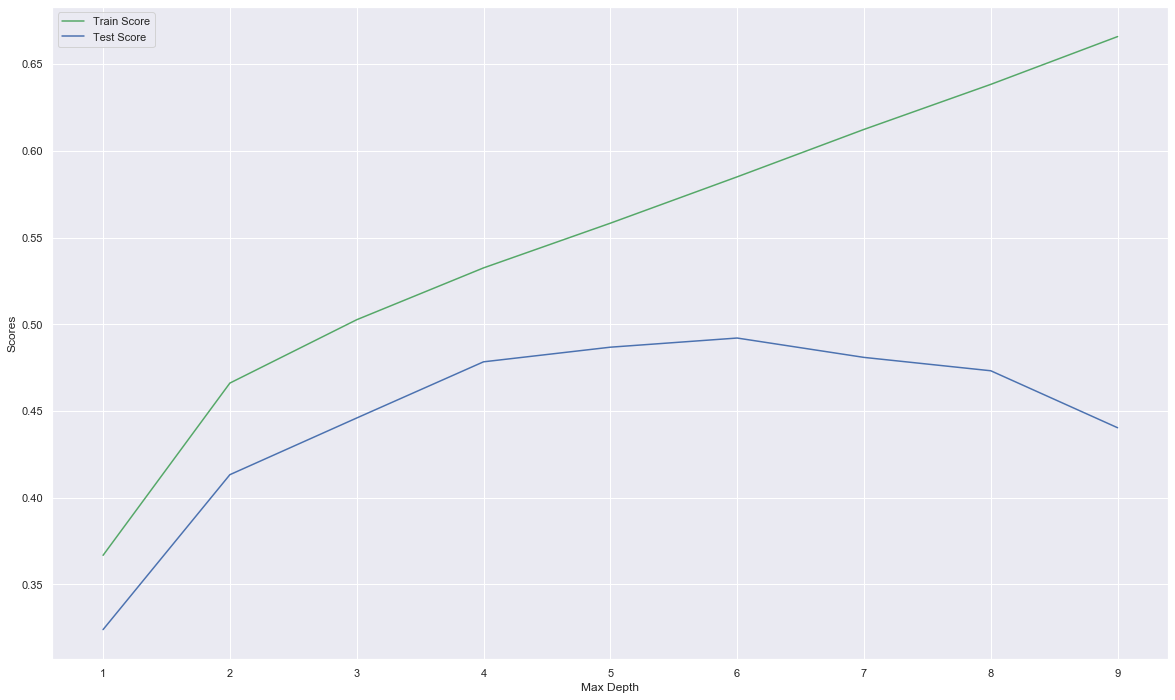

In [88]:
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})


train_score_array = []
test_score_array = []

for n in range(1,10):
    tree = DecisionTreeRegressor(max_depth=n,random_state=0)
    tree.fit(X_train, y_train)
    train_score_array.append(tree.score(X_train, y_train))
    test_score_array.append(tree.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [89]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)

y_pred=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))


Train score: 46.6090 %
Test score: 41.3260 %


### Grid Search - Decision Tree Regressor

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {
            'max_depth' : range(1,10),
            'min_samples_leaf' : range(1,10)
            }

CV_tree = GridSearchCV(estimator =tree, param_grid = param_grid_tree , return_train_score=True, n_jobs = -1, cv=10)
CV_tree.fit(X_train, y_train)

best_parameters_tree=CV_tree.best_params_
print(best_parameters_tree)

{'max_depth': 7, 'min_samples_leaf': 6}


#### Best params from gridsearch

In [91]:
tree = DecisionTreeRegressor(max_depth=CV_tree.best_params_.get('max_depth'),min_samples_leaf=CV_tree.best_params_.get('min_samples_leaf'))
tree.fit(X_train, y_train)

y_pred_tree=tree.predict(X_test)

print('Train score: {:.4f} %'.format(tree.score(X_train, y_train)*100))
print('Test score: {:.4f} %'.format(tree.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_tree))))
print('r2_score :', tree.score(X_test,y_test))
tree_S = tree.score(X_test,y_test)

Train score: 60.2775 %
Test score: 48.7681 %
RMSE: 0.5078
r2_score : 0.4876811310558109


#### CV -decision trees

In [92]:
from sklearn.model_selection import cross_val_score, cross_val_predict
tree1 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=3)
scores_train = cross_val_score(tree1, X_train, y_train,cv=10)
scores_test = cross_val_predict(tree1, X_test, y_test,cv=10)
print("Cross-validation scores_train: {}".format(scores_train.mean()))
print("Cross-validation scores_test: {}".format(scores_test.mean()))
print("Average cross-validation score_test: {:.2f}".format(scores_test.mean()))
print("Average cross-validation score_train: {:.4f}".format(scores_train.mean()))

Cross-validation scores_train: 0.521538817728638
Cross-validation scores_test: 4.804867752124089
Average cross-validation score_test: 4.80
Average cross-validation score_train: 0.5215


## The Best Model

In [93]:

# initialize list of lists 
data = [['KNN',knn_reg_S], 
        ['Linear regression',lreg_S],
        ['Ridge',ridge1_S],
        ['Lasso', lasso_S],
        ['Polynomial',poly_S],
        ['Simple linear SVM ',linear_svm_S],
        ['SVM with linear kernel',clf_S],
        ['SVM with poly kernel',clf_poly_S], 
        ['SVM with rbf kernel',clf_SVR_S],
        ['decision tree',tree_S]]

# Create the pandas DataFrame 
results = pd.DataFrame(data, columns = ['Model', 'r2 score']) 
  
# print dataframe. 
results

,Model,r2 score
0,KNN,0.443362
1,Linear regression,0.503333
2,Ridge,0.502905
3,Lasso,0.502367
4,Polynomial,negative
5,Simple linear SVM,0.49455
6,SVM with linear kernel,0.494692
7,SVM with poly kernel,0.51
8,SVM with rbf kernel,0.519203
9,decision tree,0.487681


As we can see comparing the average score schieved by cross validation on our training dataset SVR with rbf kernel has the best score between the models and therefore is the chosen model.After that lasso would be our second model for best prediction.